# Logistic regression

We consider logistic regression to classify digits on the MNIST data set. The reference page on scikit-learn is https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**There are 7 questions to answer.**

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# set up the random number generator: given seed for reproducibility, None otherwise
# (see https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng)
my_seed = 1
rng = np.random.default_rng(seed=my_seed) 

# Construction of the dataset 

We use the MNIST dataset already encountered in the hands-on session on PCA. 

In [2]:
# load data from Keras, values between 0 and 255 initially
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('initial data type for images = ',x_train.dtype,', initial data shape = ',x_train.shape)
print('initial data type for labels = ',y_train.dtype,', initial label shape = ',y_train.shape,'\n')
    
# renormalize to have data between 0 and 1; could alternatively use built-in rescaling function
# such as https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
x_train = x_train/255. 
x_test = x_test/255.
print('Train set: data set size =',x_train.shape[0])
print('Test set:  data set size =',x_test.shape[0])

# reshape the data points, which are 28x28 tensors, into a single vector of size 28x28=784
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

initial data type for images =  uint8 , initial data shape =  (60000, 28, 28)
initial data type for labels =  uint8 , initial label shape =  (60000,) 

Train set: data set size = 60000
Test set:  data set size = 10000


We can plot the first elements of the resulting data set in order to see what they looks like.

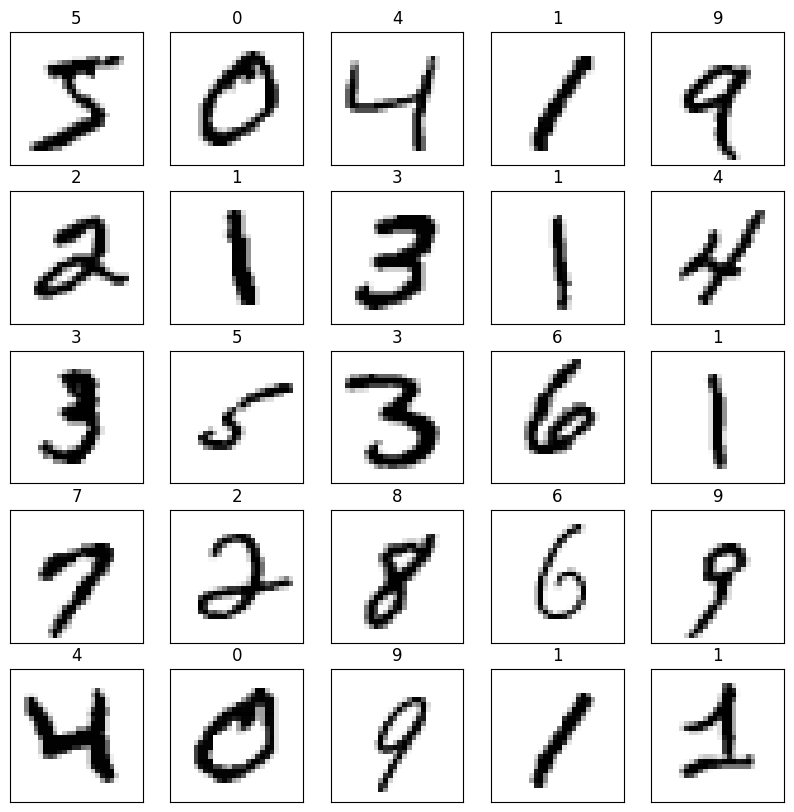

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # color map = binary, other choices here https://matplotlib.org/stable/tutorials/colors/colormaps.html
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary)     
    plt.title(y_train[i])
plt.show()

# Logistic regression for two digits only

We start by making predictions with logistic regression in the case when the data set contains only two digits. We choose for instance 0 and 8 since these two digits are rather similar, but other choices can be explored.

### Creating a dataset of two digits only

**Question 1.** Extract from the full training dataset a dataset composed only of the images whose labels correspond to one of the chosen digits (determined the variables *digit_1* and *digit_2*). Do the same for the test dataset.

In [4]:
digit_1 = 8
digit_2 = 0

# for training data
indices_two_digits = (y_train == digit_1) | (y_train == digit_2)
x_train_two_digits, y_train_two_digits = x_train[indices_two_digits], y_train[indices_two_digits]
print('Shape of train data: ',x_train_two_digits.shape)
print('Shape of train labels:',y_train_two_digits.shape)

# same for test
indices_two_digits_test = (y_test == digit_1) | (y_test == digit_2)
x_test_two_digits, y_test_two_digits = x_test[indices_two_digits_test], y_test[indices_two_digits_test]
print('Shape of test data: ',x_test_two_digits.shape)
print('Shape of test labels:',y_test_two_digits.shape)

Shape of train data:  (11774, 784)
Shape of train labels: (11774,)
Shape of test data:  (1954, 784)
Shape of test labels: (1954,)


We can check whether this was done correctly by plotting the images in the so-obtained train dataset.

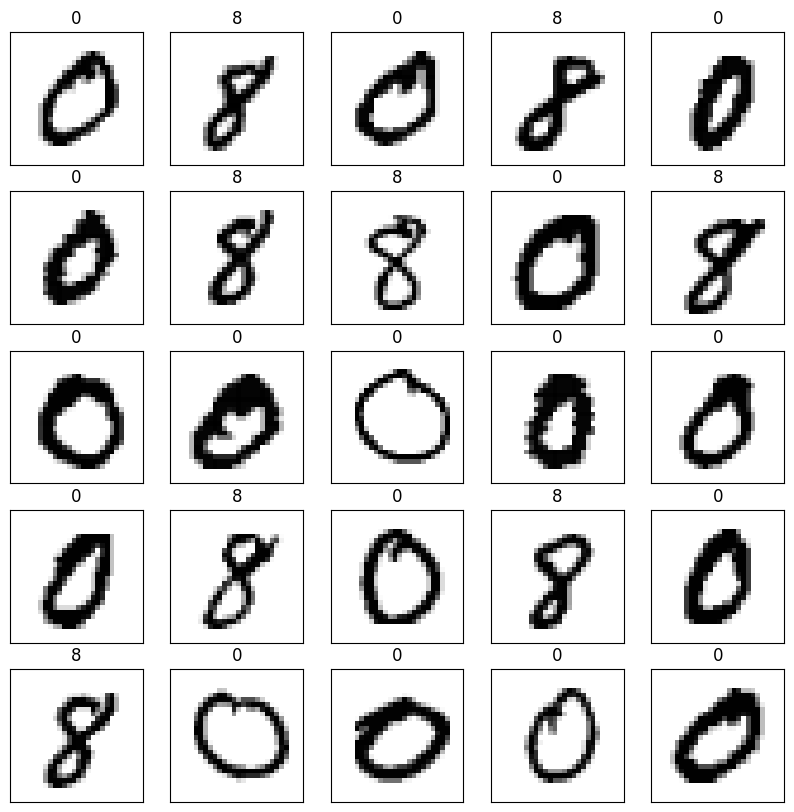

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # color map = binary, other choices here https://matplotlib.org/stable/tutorials/colors/colormaps.html
    plt.imshow(x_train_two_digits[i].reshape(28,28), cmap=plt.cm.binary)     
    plt.title(y_train_two_digits[i])
plt.show()

### Training logistic regression on this database



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

We first standardize the data (all features are centered and have unit variance).

In [7]:
scaler = StandardScaler()
x_train_two_digits = scaler.fit_transform(x_train_two_digits)
x_test_two_digits = scaler.transform(x_test_two_digits)

We can now perform logistic regression. We can use some regularization, by setting the penalty norm to 'none', 'l1', 'l2' or 'elasticnet'. This requires adapting the solver accordingly, see the documentation on the scikit-learn webpage quoted at the beginning of this notebook.

**Question 2.** Run logistic regression with the options 'l1' and 'l2' (optionnally: 'elasticnet' as well if you want). Beware that some methods may take quite some time to converge...

In [8]:
clf = LogisticRegression(C=0.01,multi_class='auto',penalty='l2',solver='newton-cg') # TO COMPLETE
# fit data
clf.fit(x_train_two_digits, y_train_two_digits)
# compute accuracy of the prediction
score = clf.score(x_test_two_digits, y_test_two_digits)
print("Test score: %.4f" % score)

Test score: 0.9939


In [9]:
# penalties = ['l1', 'l2', 'elasticnet', None]
penalties = ['l1', 'l2', None]
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
C_values = [0.01, 0.1, 1, 10]  # Example constant C values

best_score = 0
best_params = {}

for penalty in penalties:
    for solver in solvers:

        if solver == 'liblinear' and penalty == None:
            continue

        if (solver == 'liblinear' and penalty == 'l1') or (solver == 'saga') or (penalty == 'l2'):
            for C in C_values:
                
                if penalty == 'elasticnet':
                    clf = LogisticRegression(C=C, multi_class='auto', penalty=penalty, solver=solver, l1_ratio=0.5)
                else:
                    clf = LogisticRegression(C=C, multi_class='auto', penalty=penalty, solver=solver)

                clf = LogisticRegression(C=C, multi_class='auto', penalty=penalty, solver=solver)
                clf.fit(x_train_two_digits, y_train_two_digits)
                score = clf.score(x_test_two_digits, y_test_two_digits)
                print(f"Penalty: {penalty}, Solver: {solver}, C: {C}, Test score: {score:.4f}")
                if score > best_score:
                    best_score = score
                    best_params = {'penalty': penalty, 'solver': solver, 'C': C}

print(f"\nBest parameters: {best_params}")
print(f"Best test score: {best_score:.4f}")


Penalty: l1, Solver: liblinear, C: 0.01, Test score: 0.9923
Penalty: l1, Solver: liblinear, C: 0.1, Test score: 0.9933
Penalty: l1, Solver: liblinear, C: 1, Test score: 0.9908
Penalty: l1, Solver: liblinear, C: 10, Test score: 0.9887


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l1, Solver: saga, C: 0.01, Test score: 0.9923


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l1, Solver: saga, C: 0.1, Test score: 0.9939


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l1, Solver: saga, C: 1, Test score: 0.9933


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l1, Solver: saga, C: 10, Test score: 0.9933
Penalty: l2, Solver: lbfgs, C: 0.01, Test score: 0.9939
Penalty: l2, Solver: lbfgs, C: 0.1, Test score: 0.9913


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Penalty: l2, Solver: lbfgs, C: 1, Test score: 0.9898


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Penalty: l2, Solver: lbfgs, C: 10, Test score: 0.9882
Penalty: l2, Solver: liblinear, C: 0.01, Test score: 0.9923
Penalty: l2, Solver: liblinear, C: 0.1, Test score: 0.9923
Penalty: l2, Solver: liblinear, C: 1, Test score: 0.9903
Penalty: l2, Solver: liblinear, C: 10, Test score: 0.9887
Penalty: l2, Solver: newton-cg, C: 0.01, Test score: 0.9939
Penalty: l2, Solver: newton-cg, C: 0.1, Test score: 0.9913
Penalty: l2, Solver: newton-cg, C: 1, Test score: 0.9898
Penalty: l2, Solver: newton-cg, C: 10, Test score: 0.9882
Penalty: l2, Solver: newton-cholesky, C: 0.01, Test score: 0.9939
Penalty: l2, Solver: newton-cholesky, C: 0.1, Test score: 0.9913
Penalty: l2, Solver: newton-cholesky, C: 1, Test score: 0.9898
Penalty: l2, Solver: newton-cholesky, C: 10, Test score: 0.9872


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l2, Solver: sag, C: 0.01, Test score: 0.9928


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l2, Solver: sag, C: 0.1, Test score: 0.9928


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l2, Solver: sag, C: 1, Test score: 0.9928


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l2, Solver: sag, C: 10, Test score: 0.9928


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l2, Solver: saga, C: 0.01, Test score: 0.9928


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l2, Solver: saga, C: 0.1, Test score: 0.9933


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l2, Solver: saga, C: 1, Test score: 0.9933


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Penalty: l2, Solver: saga, C: 10, Test score: 0.9933


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Penalty: None, Solver: saga, C: 0.01, Test score: 0.9933


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: None, Solver: saga, C: 0.1, Test score: 0.9933


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Penalty: None, Solver: saga, C: 1, Test score: 0.9933
Penalty: None, Solver: saga, C: 10, Test score: 0.9933

Best parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.1}
Best test score: 0.9939


c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Question 3.** Determine the level of sparsity of the coefficients in the logistic regression model, by computing the fraction of non-zero coefficients.

In [10]:
# Compute sparsity
sparsity = np.mean(clf.coef_ == 0) * 100
print("Sparsity: %.2f%%" % sparsity)

Sparsity: 22.58%


We next plot the weights in the shape of an image, to better visualize which pixels count more.

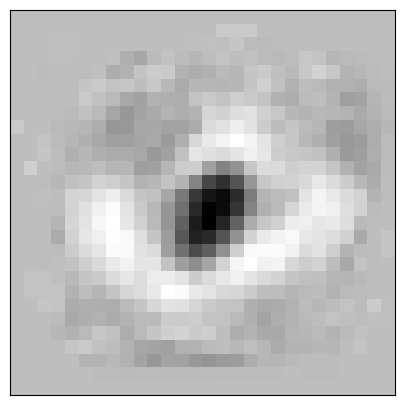

In [11]:
weights = clf.coef_.copy()
plt.figure(figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(weights.reshape(28,28), cmap=plt.cm.binary)
plt.show()

We can now have a closer look at the values of the decision function. 

**Question 4.** Plot the histograms of the values of the decision functions for each of the digits. What do you observe?

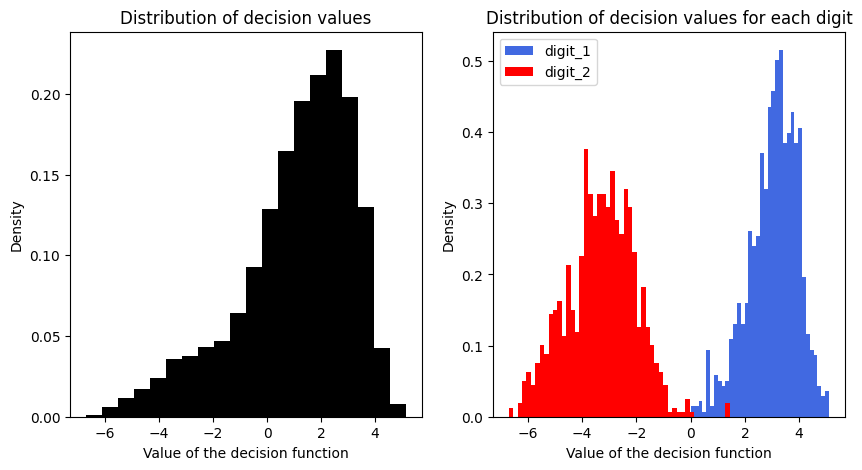

In [12]:
decision_pred_test = clf.decision_function(x_test)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(decision_pred_test,bins=20,color='black',density=True)
plt.xlabel("Value of the decision function")
plt.ylabel("Density")
plt.title('Distribution of decision values')
# we can look at the value for the images corresponding to digit_1 and digit_2, respectively
indices_digit_1 = np.where(y_test == digit_1)[0]
decision_pred_test_1 = clf.decision_function(x_test[indices_digit_1])
indices_digit_2 = np.where(y_test == digit_2)[0]
decision_pred_test_2 = clf.decision_function(x_test[indices_digit_2])
plt.subplot(1, 2, 2)
plt.hist(decision_pred_test_1,bins=50,color='royalblue',density=True)
plt.hist(decision_pred_test_2,bins=50,color='red',density=True)
plt.xlabel("Value of the decision function")
plt.ylabel("Density")
plt.legend(['digit_1','digit_2'])
plt.title('Distribution of decision values for each digit')
plt.show()

The first digit is characterized by positive values of the decision function, while the other one is associated with negative values.

We can also plot the distribution of prediction probabilities. These probabilities give us some indication of the confidence of the prediction.

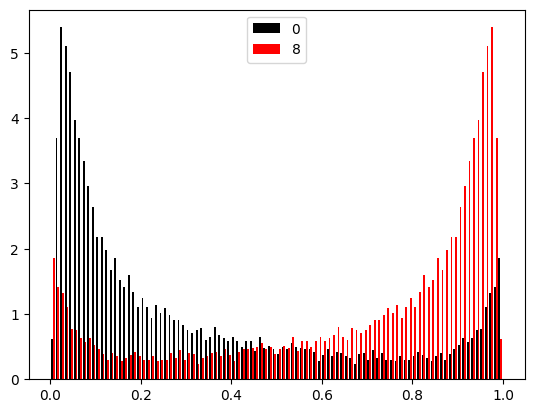

In [13]:
proba_pred_test = clf.predict_proba(x_test)
plt.hist(proba_pred_test,bins=100,color=['black','red'],density=True)
# Equivalent to the following two lines
#plt.hist(proba_pred_test[:,0],bins=100,color=['black'],density=True)
#plt.hist(proba_pred_test[:,1],bins=100,color=['red'],density=True)
plt.legend(clf.classes_)
plt.show()

# Multiclass logistic regression

We now turn to classification for all digits. We only perform logistic regression for a given value of the regularization parameter (or possibly no regularization). Cross validation can be performed using the built in function https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

We start by reloading the dataset (for instance to avoid any kind of side effect related to the normalization of the data).

In [37]:
# load data from Keras, values between 0 and 255 initially
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('initial data type for images = ',x_train.dtype,', initial data shape = ',x_train.shape)
print('initial data type for labels = ',y_train.dtype,', initial label shape = ',y_train.shape,'\n')
    
# renormalize to have data between 0 and 1; could alternatively use built-in rescaling function
# such as https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
x_train = x_train/255. 
x_test = x_test/255.
print('Train set: data set size =',x_train.shape[0])
print('Test set:  data set size =',x_test.shape[0])

# reshape the data points, which are 28x28 tensors, into a single vector of size 28x28=784
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

initial data type for images =  uint8 , initial data shape =  (60000, 28, 28)
initial data type for labels =  uint8 , initial label shape =  (60000,) 

Train set: data set size = 60000
Test set:  data set size = 10000


We can possibly reduce the size of the dataset in order to have a faster training.

In [38]:
subsampling_rate = 1
# start:sto:step 
x_train_subsampled = x_train[0::subsampling_rate]
y_train_subsampled = y_train[0::subsampling_rate]
print('Initial dimension of the data:',x_train.shape)
print('After subsampling at rate',subsampling_rate,':',x_train_subsampled.shape)

Initial dimension of the data: (60000, 784)
After subsampling at rate 1 : (60000, 784)


We next standardize the data.

In [39]:
scaler = StandardScaler()
x_train_subsampled = scaler.fit_transform(x_train_subsampled)
x_test = scaler.transform(x_test)

We are now in position to peform logistic regression.

**Question 5.** Perform logistic regression by choosing appropriate options in the arguments of the function LogisticRegression(), and try to achieve the best possible performance by comparing a few options. 

In [17]:
# # Define the parameter grid
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', None],
#     'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
#     'C': [0.01, 0.1, 1, 10],
#     'l1_ratio': [0.1, 0.5, 0.9]
# }

# best_score = 0
# best_params = {}

# for penalty in penalties:
#     for solver in solvers:

#         if solver == 'liblinear' and penalty == None:
#             continue

#         if (solver == 'liblinear' and penalty == 'l1') or (solver == 'saga') or (penalty == 'l2'):
#             for C in C_values:
                
#                 if penalty == 'elasticnet':
#                     clf = LogisticRegression(C=C, multi_class='auto', penalty=penalty, solver=solver, l1_ratio=0.5)
#                 else:
#                     clf = LogisticRegression(C=C, multi_class='auto', penalty=penalty, solver=solver)

#                 clf = LogisticRegression(C=C, multi_class='auto', penalty=penalty, solver=solver)
#                 clf.fit(x_train_subsampled, y_train_subsampled)
#                 score = clf.score(x_test_two_digits, y_test_two_digits)
#                 print(f"Penalty: {penalty}, Solver: {solver}, C: {C}, Test score: {score:.4f}")
#                 if score > best_score:
#                     best_score = score
#                     best_params = {'penalty': penalty, 'solver': solver, 'C': C}

# print(f"\nBest parameters: {best_params}")
# print(f"Best test score: {best_score:.4f}")


In [18]:
clf = LogisticRegression(C=0.01, multi_class='auto', penalty='l2', solver='newton-cg')
# fit data
clf.fit(x_train_subsampled, y_train_subsampled)
# compute accuracy of the prediction
score = clf.score(x_test, y_test)
print(f"Test score: {score:.4f}")

Test score: 0.9263


We can analyse the results by looking at the confusion matrix, see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html In the $i$th line, we represent the predicted labels for the digits labeled as $i$ in the dataset.

In [19]:
from sklearn import metrics
y_pred = clf.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 961    0    0    2    0    7    5    3    2    0]
 [   0 1112    3    2    0    1    4    2   11    0]
 [   7    7  927   19    9    3   11    9   37    3]
 [   3    1   17  922    1   25    3   10   22    6]
 [   1    2    3    2  920    0   12    4    8   30]
 [   7    2    1   35    8  774   17   12   32    4]
 [  11    3    8    1    7   14  910    2    2    0]
 [   1    8   22    7    5    1    0  951    2   31]
 [   7    9    6   21    9   24    9   12  867   10]
 [  10    8    1   10   26    5    0   24    6  919]]


**Question 6.** Which digits has the largest number of missclassified instances?

In [20]:
# TO COMPLETE
largest_missclassified_digit = np.argmax(np.sum(cm, axis=1) - np.diag(cm))
print("The digit with the largest number of misclassified instances is", largest_missclassified_digit)

The digit with the largest number of misclassified instances is 5


The confusion matrix can be nicely plotted using *seaborn* (see https://seaborn.pydata.org/).

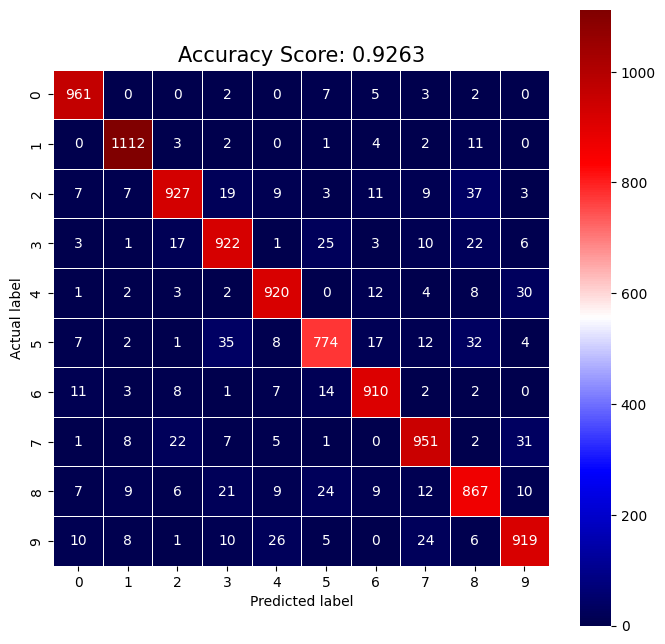

In [21]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'seismic');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

**Question 7.** Complete the code below to look at some missclassified digits.

In [22]:
# construct the list of indices corresponding to the missclassified digits 
misclassifiedIndices = []
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        misclassifiedIndices.append(i)

In [23]:
x_test = scaler.inverse_transform(x_test)

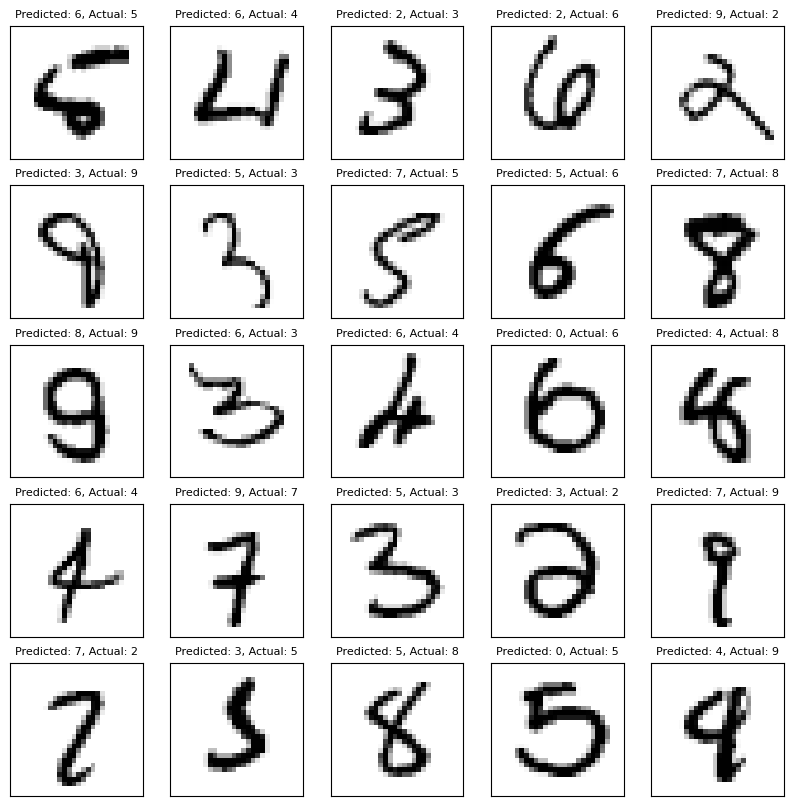

In [24]:
plt.figure(figsize=(10, 10))
for plotIndex, badIndex in enumerate(misclassifiedIndices[0:25]):
    plt.subplot(5, 5, plotIndex+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[badIndex].reshape(28,28), cmap=plt.cm.binary)     
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y_test[badIndex]), fontsize = 8)
plt.show()

We can finally have a look at the various weights used in the softmax classification.

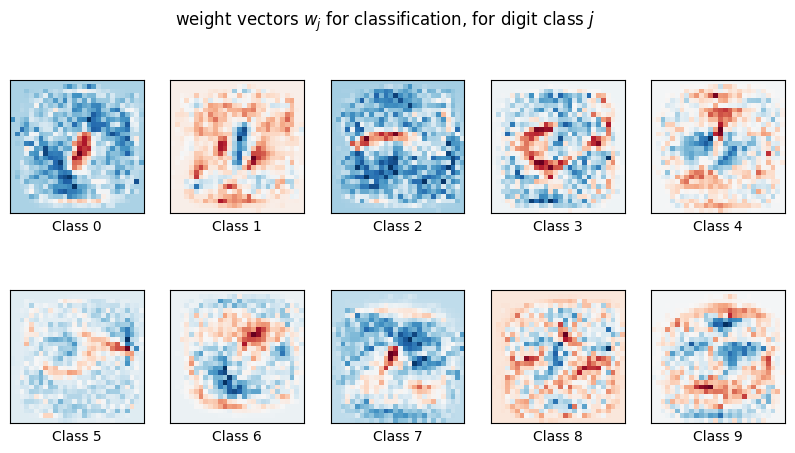

In [25]:
coefficients = clf.coef_.copy()
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(coefficients[i].reshape(28, 28), interpolation='nearest',cmap=plt.cm.RdBu)
    plt.xlabel('Class %i' % i)
plt.suptitle('weight vectors $w_j$ for classification, for digit class $j$')
plt.show()

## Possible extensions

It would be interesting to check how the results change when PCA is performed as a pre-processing, in particular what is the quality of the classification depending on the number of PCA components which are kept, how much faster the method is, etc. Plotting learning curves and choosing regularization parameters via cross validation would be useful as well.